<a href="https://colab.research.google.com/github/NilamKarande/sign_recognition_system/blob/main/Final_mnist_sign_language_recognition_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv('/content/sign_mnist_train.csv')
test=pd.read_csv('/content/sign_mnist_test.csv')

In [4]:

train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:

#get our training labels
labels=train['label'].values

In [6]:

#view the unique label till 24
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

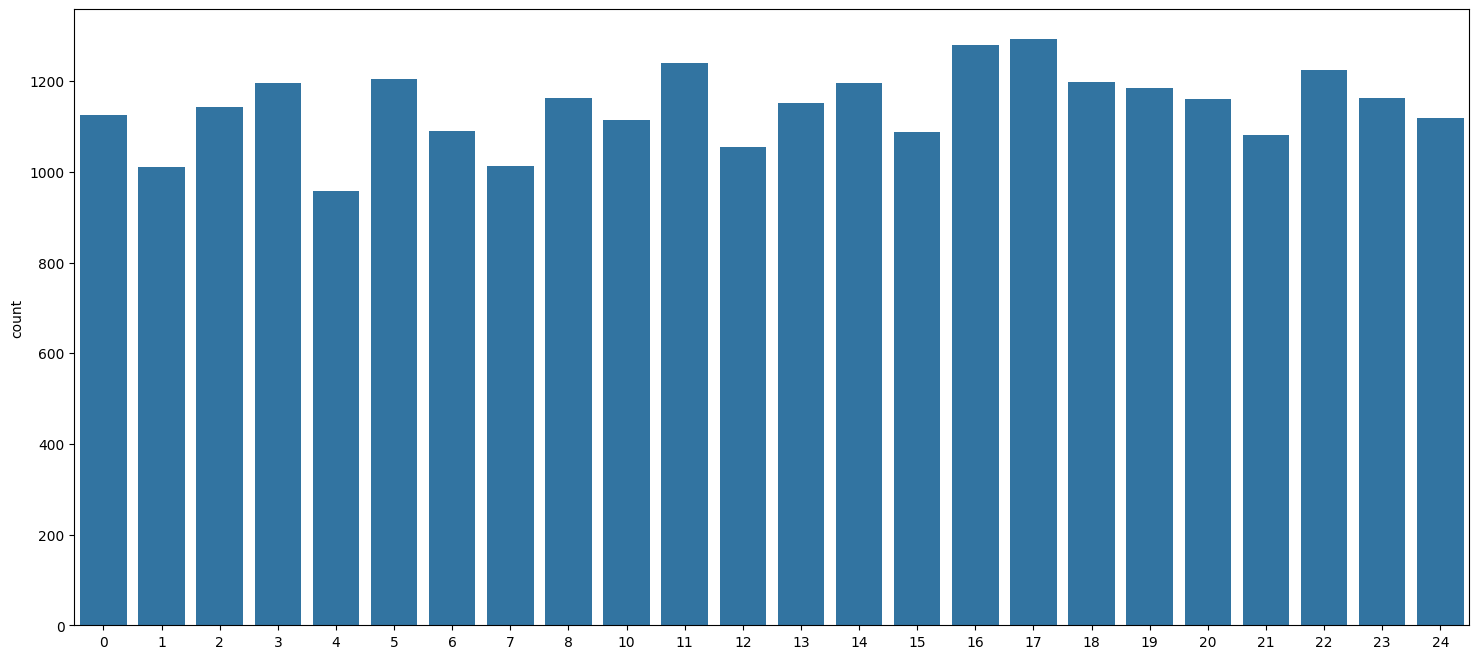

In [7]:
#plot qantities in each class
plt.figure(figsize=(18,8))
sns.countplot(x=labels)


In [8]:

#drop training labels from our training data so we can separate it
train.drop('label',axis=1,inplace=True)

In [9]:
#extract the image data from each row in our csv, remember it's in a row of 784 columns
images=train.values
images=np.array([np.reshape(i,(28,28)) for i in images])
images=np.array([i.flatten() for i in images])

In [10]:
#hot one encode our labels
from sklearn.preprocessing import LabelBinarizer
label_binrizer=LabelBinarizer()
labels=label_binrizer.fit_transform(labels)

In [11]:
#view our labels
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


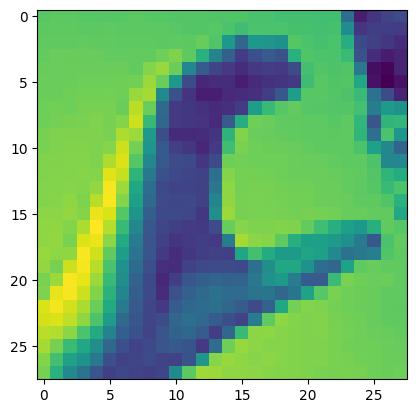

In [12]:
#inspect an image
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [15]:
# #use opencv to view 10 random images from our training data
# import cv2
# import numpy

# for i in range(0,10):
#     rand = np.random.randint(0,len(images))
#     input_im=images[rand]

#     sample = input_im.reshape(28,28).astype(np.uint8)
#     sample = cv2.resize(sample,None, fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
#     cv2.imshow("sample image", sample)
#     cv2.waitKey(0)
# cv2.destroyAllWindows()

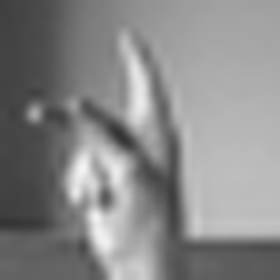

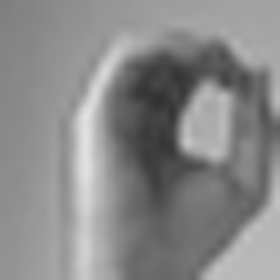

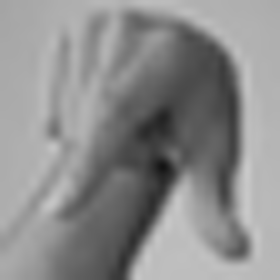

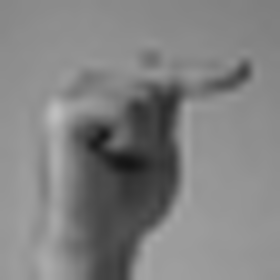

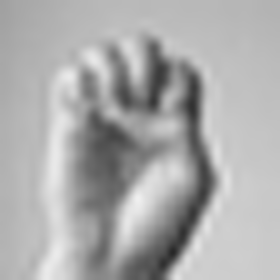

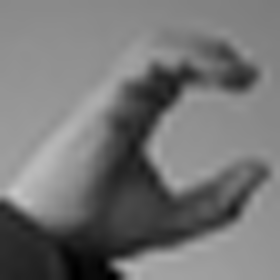

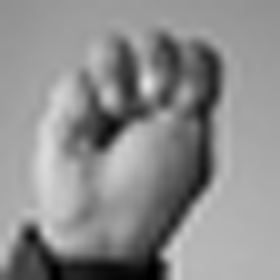

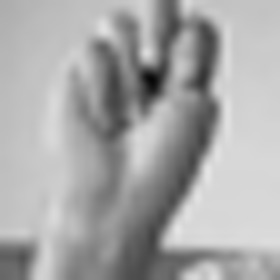

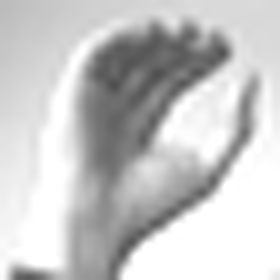

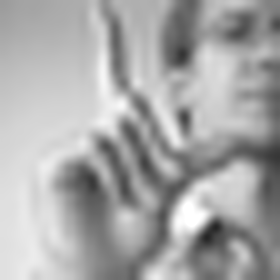

In [14]:

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Assuming `images` is your dataset containing the images
for i in range(0, 10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28, 28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2_imshow(sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:

#split our data into x_train,y_train and y_test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.3,random_state=101)

In [17]:
#start loading our tensorflow modules and define out batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

batch_size=128
num_classes=24
epochs=10

In [18]:
#scale our images
x_train=x_train/255
x_test=x_test/255

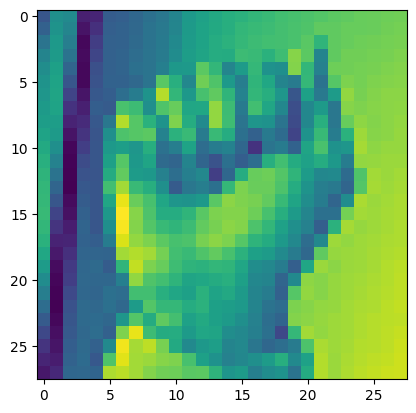

In [19]:
#reshape them into the size required by TF and keras
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [20]:
#create our cnn model
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes,activation='softmax'))

In [21]:
#compile our model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [22]:
#train our model
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 37s 238ms/step - loss: 2.6678 - accuracy: 0.1738 - val_loss: 1.8349 - val_accuracy: 0.4108
Epoch 2/10
151/151 [==============================] - 32s 209ms/step - loss: 1.3958 - accuracy: 0.5265 - val_loss: 0.9095 - val_accuracy: 0.7153
Epoch 3/10
151/151 [==============================] - 34s 224ms/step - loss: 0.8119 - accuracy: 0.7208 - val_loss: 0.5992 - val_accuracy: 0.8002
Epoch 4/10
151/151 [==============================] - 35s 230ms/step - loss: 0.5407 - accuracy: 0.8153 - val_loss: 0.3358 - val_accuracy: 0.8917
Epoch 5/10
151/151 [==============================] - 43s 279ms/step - loss: 0.3678 - accuracy: 0.8748 - val_loss: 0.2749 - val_accuracy: 0.9138
Epoch 6/10
151/151 [==============================] - 31s 206ms/step - loss: 0.2750 - accuracy: 0.9074 - val_loss: 0.1660 - val_accuracy: 0.9490
Epoch 7/10
151/151 [==============================] - 30s 201ms/step - loss: 0.1809 - accuracy: 0.9417 - val_loss: 0.0970 - val_ac

In [23]:
#save our model
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


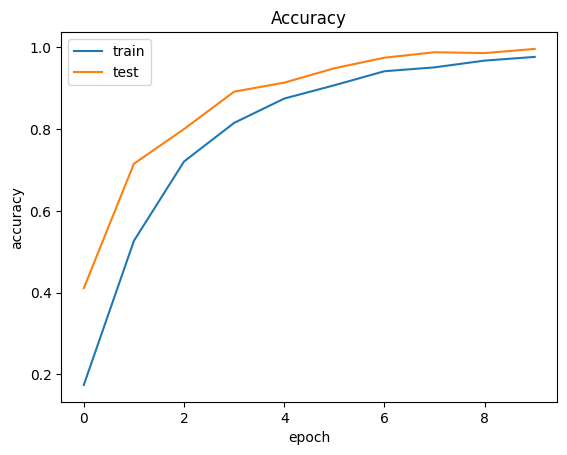

In [24]:
#view our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [25]:
#reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']

In [26]:
test.drop('label', axis = 1, inplace = True)

In [27]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [28]:
test_images.shape
test_images.dtype

dtype('int64')

In [29]:
import tensorflow
test_images = tensorflow.cast(test_images, tensorflow.float32)
y_pred = model.predict(test_images)
#get accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

225/225 [==============================] - 5s 21ms/step


0.7717512548800892

In [33]:
#create function to match label to letter
def getLetter(result):
    classLabels={
      0:'A',
      1:'B',
      2:'C',
      3:'D',
      4:'E',
      5:'F',
      6:'G',
      7:'H',
      8:'I',
      9:'K',
      10:'L',
      11:'M',
      12:'N',
      13:'O',
      14:'P',
      15:'Q',
      16:'R',
      17:'S',
      18:'T',
      19:'U',
      20:'V',
      21:'W',
      22:'X',
      23:'Y'
  }
    try:
        res=int(result)
        return classLabels[res]
    except:
        return "Error"

In [ ]:
# Install necessary packages
!pip install opencv-python-headless tensorflow

# Import necessary libraries
import cv2
import numpy as np
import tensorflow as tf
from google.colab.output import eval_js
from IPython.display import Javascript, display
from base64 import b64decode, b64encode
from io import BytesIO
from PIL import Image

In [37]:


# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# Helper functions to convert between JavaScript and OpenCV formats
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    img = Image.open(BytesIO(image_bytes))
    return np.array(img)

def bbox_to_bytes(bbox_array):
    img = Image.fromarray(bbox_array, 'RGBA')
    f = BytesIO()
    img.save(f, format='png')
    return 'data:image/png;base64,' + b64encode(f.getvalue()).decode('utf-8')


In [38]:

# Load your trained model here
model = tf.keras.models.load_model('/content/sign_mnist_cnn_50_Epochs.h5')


# Start video stream
video_stream()
label_html = 'Capturing...'
bbox = ''
count = 0

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    roi = gray[100:400, 320:620]
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = roi.reshape(1, 28, 28, 1).astype('float32') / 255.0

    prediction = model.predict(roi)
    result = np.argmax(prediction, axis=1)[0]
    letter = getLetter(result)

    label_html = f'Predicted: {letter}'
    bbox = ''

    # Show the prediction on the video stream
    cv2.putText(img, letter, (320, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)
    bbox_array[:, :, :3] = img
    bbox_array[:, :, 3] = 255

    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 32ms/step
